In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
import requests
from cpymad.madx import Madx
from os import walk
import pandas as pd
import pickle
from pybt.tools.plotters import *

In [20]:
def read_progress():
    params = []
    objectives = []
    with open('progress.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            params.append(list(map(float, row[:-1])))
            objectives.append(float(row[-1]))
    return np.array(params), np.array(objectives)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


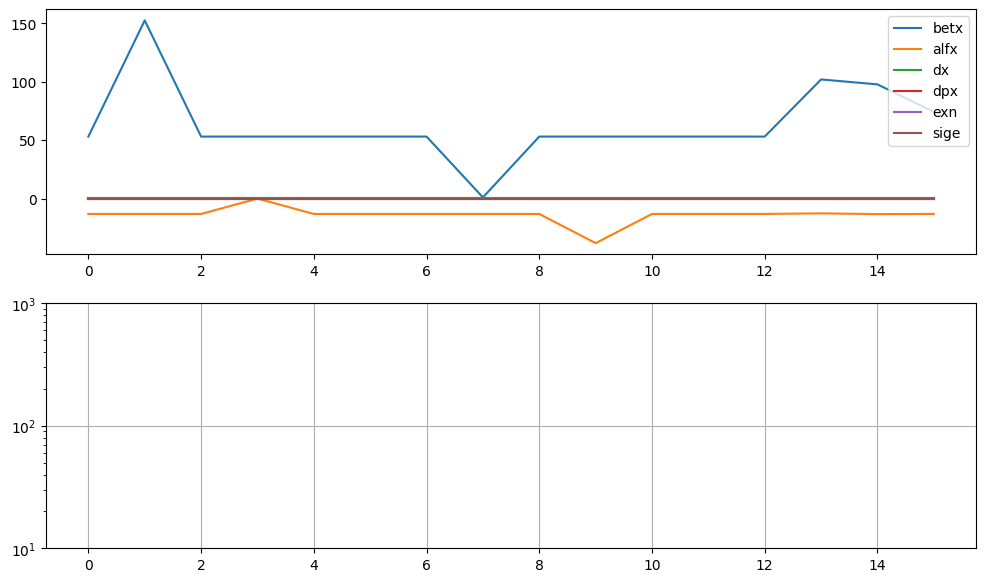

In [21]:

params, objectives = read_progress()
fig,ax = plt.subplots(2,1, figsize=(12,7))

ax[0].legend()
ax[1].set_yscale("log")

ax[0].clear()
ax[1].clear()
ax[0].plot(params[:, 0], label="betx")
ax[0].plot(params[:, 1], label="alfx")
ax[0].plot(params[:, 2], label="dx")
ax[0].plot(params[:, 3], label="dpx")
ax[0].plot(params[:, 4], label="exn")
ax[0].plot(params[:, 5], label="sige")
ax[0].legend()

ax[1].plot(objectives)
ax[1].set_yscale("log")
ax[1].set_ylim(10,1e3)
ax[1].grid()

In [22]:
# start_path = "/eos/home-e/eljohnso/SWAN_projects/quad-scan-east/df/small_df/"
start_path = "../quad_scan_east_slow_ions_2023_1gev/df/"
end_path = ""
mypath = start_path+"/"+end_path

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
filenames = sorted(filenames)

# Select all measurements available
new_df = pd.DataFrame()

j = 0
for i in range(len(filenames)):
    with open(start_path+filenames[i], 'rb') as handle:
        df = pickle.load(handle)
        # print(len(df))
        print(filenames[i])
    new_df = pd.concat([new_df,df])

new_df.reset_index(inplace=True)

quad_scan_east_slow_ions_2023_1GeV_2023_10_09_16h49m30s_df.pickle
quad_scan_east_slow_ions_2023_1GeV_2023_10_09_17h06m57s_df.pickle


In [23]:
# # 2 GeV
# # Select all measurements available
# new_df = pd.DataFrame()

# j = 0
# for i in range(len(filenames)):
#     with open(start_path+filenames[i], 'rb') as handle:
#         df = pickle.load(handle)
#         print(filenames[i])
#     if filenames[i] in [
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_12h15m10s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h19m11s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_13h57m22s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_14h37m04s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_15h13m20s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_09_05_16h19m47s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_09h23m05s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h11m04s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_10h57m45s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h32m04s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_2GeV_2023_10_02_11h56m29s_df.pickle',
#                         ]:    
#         new_df = pd.concat([new_df,df])

# new_df.reset_index(inplace=True)


# # 1.4 GeV
# # Select all measurements available
# new_df = pd.DataFrame()

# j = 0
# for i in range(len(filenames)):
#     with open(start_path+filenames[i], 'rb') as handle:
#         df = pickle.load(handle)
#         print(filenames[i])
#     if filenames[i] in [
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_02_13h11m25s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_02_13h58m16s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_02_14h59m19s_df.pickle',
#         # 'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_14h27m51s_df.pickle',
#         'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_15h07m39s_df.pickle',
#         'quad_scan_east_slow_ions_2023_1_4GeV_2023_10_09_15h50m08s_df.pickle',
#                         ]:    
#         new_df = pd.concat([new_df,df])

# new_df.reset_index(inplace=True)

# 1.0 GeV
# Select all measurements available
new_df = pd.DataFrame()

j = 0
for i in range(len(filenames)):
    with open(start_path+filenames[i], 'rb') as handle:
        df = pickle.load(handle)
        print(filenames[i])
    if filenames[i] in [
        # 'quad_scan_east_slow_ions_2023_1GeV_2023_10_09_16h49m30s_df.pickle'
        'quad_scan_east_slow_ions_2023_1GeV_2023_10_09_17h06m57s_df.pickle'
    ]:
        new_df = pd.concat([new_df,df])

new_df.reset_index(inplace=True)

quad_scan_east_slow_ions_2023_1GeV_2023_10_09_16h49m30s_df.pickle
quad_scan_east_slow_ions_2023_1GeV_2023_10_09_17h06m57s_df.pickle


396.1446200786813


Text(0.7, 0.95, 'Matched initial parameters:\n$p/q$=10.706\n$\\beta_{x}$=44.093\n$\\beta_{y}$=3.821\n$\\alpha_{x}$=-10.723\n$\\alpha_{y}$=0.958\n$D_{x}$=0.13\n$D_{y}$=0.0\n$D_{px}$=0.02\n$D_{py}$=0.0\n$exn$=2.4e-05\n$eyn$=1.041e-05\n$\\frac{dp}{p}$=0.0045')

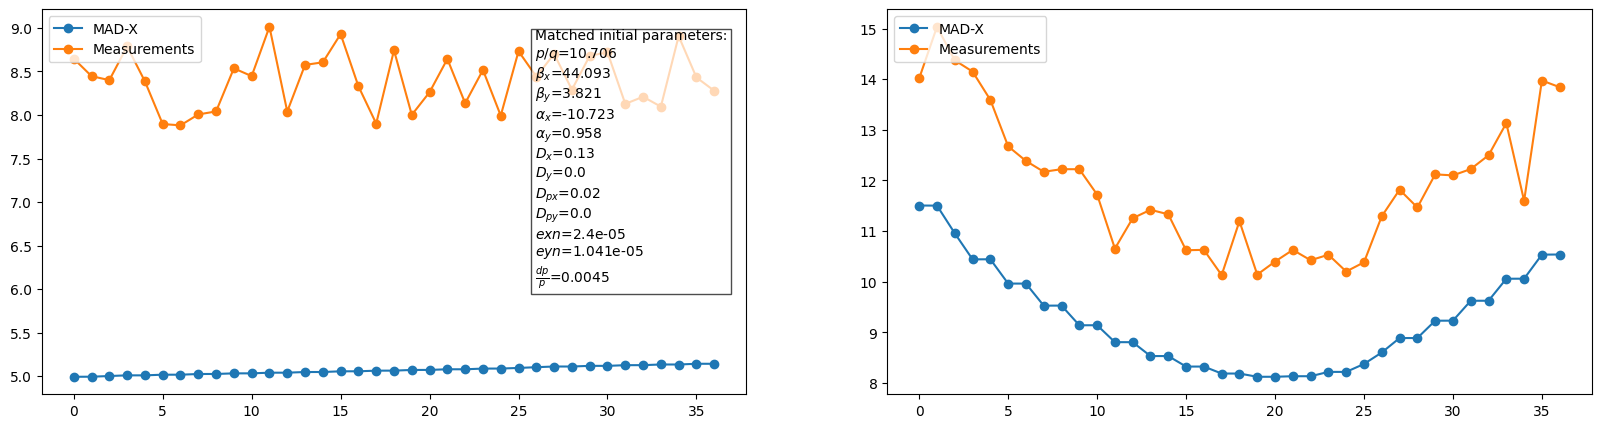

In [24]:
E_cin_per_nucleon = 2

# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

gamma = p/charge/0.938
beta = np.sqrt(1-gamma**(-2))
exn=1.5e-6
eyn=1.5e-6
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
sige = 7.53e-4 # Energy spread

# Try solution

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.ele").text) 
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.str").text) 
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.seq").text) 
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61d/f61d.dbx").text) 
madx.command.beam(particle='PROTON',pc=p/charge,ex=ex,ey=ey)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')  
madx.use(sequence="f61d")

btv="f61.btv010"

# betx0 = soln.x[0]
# bety0 = soln.x[1]
# alfx0 = soln.x[2]
# alfy0 = soln.x[3]

# # bety0 = 5.2
# # alfy0 = 0.25

# dx0 = 0.13
# dy0 = 0.0
# dpx0 = 0.02
# dpy0 = 0

# # exn = 7.6e-6
# # eyn = 3.5e-6
# # sige = 6.79e-4

# exn = soln.x[4]
# eyn = soln.x[5]
# sige = soln.x[6]



# # Only H
# betx0 = soln.x[0]
# alfx0 = soln.x[1]
# exn = soln.x[2]
# sige = soln.x[3]

# bety0 = 3.756
# alfy0 = 0.545
# eyn = 8.36e-6

# dx0 = 0.13
# dy0 = 0.0
# dpx0 = 0.02
# dpy0 = 0

# # Only V
# bety0 = soln.x[0]
# alfy0 = soln.x[1]
# eyn = soln.x[2]
# sige = soln.x[3]

# betx0 = 44.006
# alfx0 = -10.812
# exn = 3.394e-5

# dx0 = 0.13
# dy0 = 0.0
# dpx0 = 0.02
# dpy0 = 0

# Only H with dispersions
betx0 = 44.093
alfx0 = -10.723
dx0 = 0.13
dpx0 = 0.02
exn = 2.4e-05

bety0 = 3.821
alfy0 = 0.958
eyn = 1.041e-05
dy0 = 0.0
dpy0 = 0.0

sige = 0.0045

# # Only V with dispersions
# bety0 = 3.702
# alfy0 = 0.863
# dy0 = 0.004
# dpy0 = 0.01
# eyn = 7e-06
# sige = 0.004473

# print(bety0)

# betx0 = 44.093
# alfx0 = -10.723
# dx0 = -0.013
# dpx0 = -0.022
# exn = 2.4e-05

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx.command.beam(particle='PROTON',pc=p/charge,ex=ex,ey=ey)

H_sigma_madx_list = []
V_sigma_madx_list = []

for i in range(len(new_df)):

    k_qfn01 = new_df.iloc[i].k_qfn01
    k_qdn02 = new_df.iloc[i].k_qdn02
    k_qfn03 = new_df.iloc[i].k_qfn03

    madx.input("kQFN1 = "+str(k_qfn01)+";")
    madx.input("kQDN2 = "+str(k_qdn02)+";")
    madx.input("kQFN3 = "+str(k_qfn03)+";")

    

    twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
    # *[ ] add air scattering

    H_sigma_madx = ( beam_size(twiss_f61d['betx'][btv], twiss_f61d['dx'][btv], ex, sige, 1) )*1000
    V_sigma_madx = ( beam_size(twiss_f61d['bety'][btv], twiss_f61d['dy'][btv], ey, sige, 1) )*1000

    H_sigma_madx_list.append(H_sigma_madx)
    V_sigma_madx_list.append(V_sigma_madx)

objective_H = np.array(abs(H_sigma_madx-new_df.sigH)**2).sum()
objective_V = np.array(abs(H_sigma_madx-new_df.sigH)**2).sum()
objective = objective_V
print(objective)


fig, ax = plt.subplots(1,2, figsize=(20,5))

# H
ax[0].plot(H_sigma_madx_list, marker="o", label="MAD-X")
ax[0].plot(new_df.sigH, marker="o", label="Measurements")

# V
ax[1].plot(V_sigma_madx_list, marker="o", label="MAD-X")
ax[1].plot(new_df.sigV, marker="o", label="Measurements")

ax[0].legend(loc = "upper left")
ax[1].legend(loc = "upper left")

# Box with initial parameters
textstr = '\n'.join((
    "Matched initial parameters:",
    r'$p/q$='+str(round(p/charge,3)),
    r'$\beta_{x}$='+str(round(betx0,3)),
    r'$\beta_{y}$='+str(round(bety0,3)),
    r'$\alpha_{x}$='+str(round(alfx0,3)),
    r'$\alpha_{y}$='+str(round(alfy0,3)),
    r'$D_{x}$='+str(round(dx0,3)),
    r'$D_{y}$='+str(round(dy0,3)),
    r'$D_{px}$='+str(round(dpx0,3)),
    r'$D_{py}$='+str(round(dpy0,3)),
    r'$exn$='+str(round(exn,8)),
    r'$eyn$='+str(round(eyn,8)),
    r'$\frac{dp}{p}$='+str(round(sige,6)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.7)

# place a text box in upper left in axes coords
ax[0].text(0.7, 0.95, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)